#### Петухова Ксения БКЛ182

Импортируем все необходимые для дальнейшей работы модули

In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pymorphy2 import MorphAnalyzer
from string import punctuation
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
morph = MorphAnalyzer()
english_stopwords = stopwords.words("english")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kseniapetuhova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
path = input('Введите путь до датасета: ')
shoes_data = pd.read_csv(path)

Введите путь до датасета: /Users/kseniapetuhova/Desktop/Shoes_Data.csv


Извлекаем дополнительные признаки:
* длина названия товара
* длина описания товара
* средняя длина отзыва на товар

Также приводим другие признаки к необходимому формату

In [143]:
len_title = []
price_new = []
rating_new = []
total_reviews_new = []
len_product_description = []
mean_len_reviews = []
shoe_type = []
for index, row in tqdm(shoes_data.iterrows()):
    len_title.append(len(row['title']))
    price_new.append(float(row['price'][1:]))
    rating_new.append(float(row['rating'][:3]))
    t_r = row['total_reviews'].replace(' ratings', '')
    t_r = t_r.replace(' rating', '')
    total_reviews_new.append(int(t_r))
    len_product_description.append(len(row['product_description']))
    splitted_rev = row['reviews'].split('||')
    len_rev = [len(i) for i in splitted_rev]
    sum_len_rev = 0
    for l in len_rev:
        sum_len_rev += l
    mean_len_rev = sum_len_rev / len(len_rev)
    mean_len_reviews.append(mean_len_rev)
    if row['Shoe Type'] == 'Men':
        shoe_type.append(0)
    else:
        shoe_type.append(1)

1230it [00:00, 2200.28it/s]


In [144]:
shoes_data_new = shoes_data.copy()
shoes_data_new['len_title'] = len_title
shoes_data_new['price_new'] = price_new
shoes_data_new['rating_new'] = rating_new
shoes_data_new['total_reviews_new'] = total_reviews_new
shoes_data_new['len_product_description'] = len_product_description
shoes_data_new['mean_len_reviews'] = mean_len_reviews
shoes_data_new['shoe_type'] = shoe_type

In [145]:
shoes_data_new

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,len_title,price_new,rating_new,total_reviews_new,len_product_description,mean_len_reviews,shoe_type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,47,279.0,2.9,2389,222,27.9,0
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,37,479.0,3.9,11520,78,28.2,0
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,20,430.0,3.3,1251,398,16.4,0
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,72,499.0,4.2,3,576,15.0,0
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,28,499.0,4.2,20110,1030,30.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women,37,7256.0,4.4,200,237,18.4,1
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women,46,5822.0,4.3,25,876,14.3,1
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women,52,5362.0,4.5,817,311,17.5,1
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women,50,7480.0,4.5,67,1629,14.9,1


Визуализируем информацию о данных

In [146]:
shoes_data_new.describe()

,len_title,price_new,rating_new,total_reviews_new,len_product_description,mean_len_reviews,shoe_type
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,42.763415,2031.842268,3.964553,815.791057,502.500000,20.717062,0.304065
std,20.524057,1729.425360,0.468047,3116.057954,805.058406,6.827617,0.460197
min,5.000000,127.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,31.000000,622.250000,3.800000,26.000000,195.000000,16.000000,0.000000
50%,38.000000,1588.000000,4.000000,118.000000,288.000000,19.550000,0.000000
75%,47.000000,2844.687500,4.200000,440.750000,560.000000,24.700000,1.000000
max,193.000000,7992.000000,5.000000,42193.000000,11855.000000,55.000000,1.000000


In [147]:
shoes_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1230 non-null   object 
 1   price                    1230 non-null   object 
 2   rating                   1230 non-null   object 
 3   total_reviews            1230 non-null   object 
 4   product_description      1230 non-null   object 
 5   reviews                  1230 non-null   object 
 6   reviews_rating           1230 non-null   object 
 7   Shoe Type                1230 non-null   object 
 8   len_title                1230 non-null   int64  
 9   price_new                1230 non-null   float64
 10  rating_new               1230 non-null   float64
 11  total_reviews_new        1230 non-null   int64  
 12  len_product_description  1230 non-null   int64  
 13  mean_len_reviews         1230 non-null   float64
 14  shoe_type               

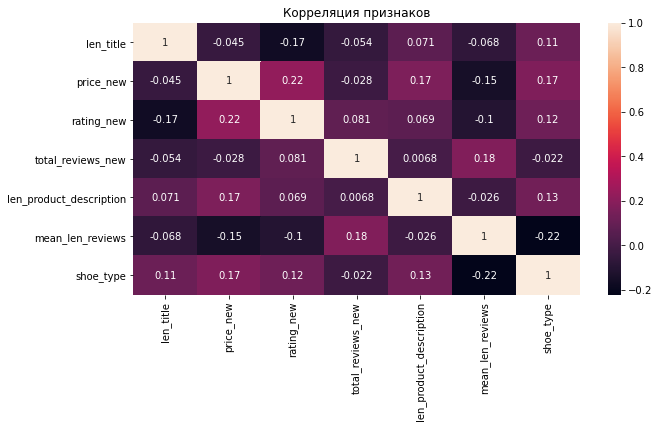

In [148]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=shoes_data_new.corr(), 
            annot=True, ax=ax)
plt.title("Корреляция признаков")
plt.show()

Text(0.5, 0, 'number of entries')

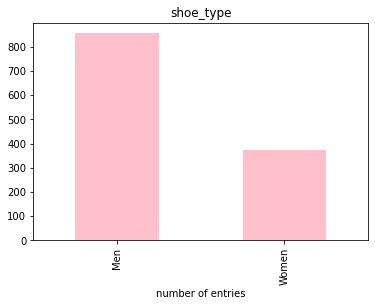

In [11]:
shoes_data['Shoe Type'].value_counts().plot.bar(color='pink');
plt.title('shoe_type')
plt.xlabel('shoe_type')
plt.xlabel('number of entries')

## Задание 1.

### Мы уже посмотрели на общую информацию о данных, поэтому теперь посмотрим на релевантные конкретно для первой задачи визуализации

Распределение цен товаров

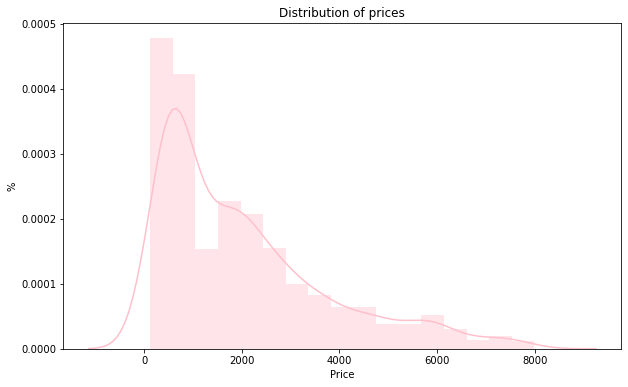

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(shoes_data_new['price_new'], bins=17, color='pink')
plt.title('Distribution of prices')
plt.ylabel('%')
plt.xlabel('Price');

Распределение оценок товаров

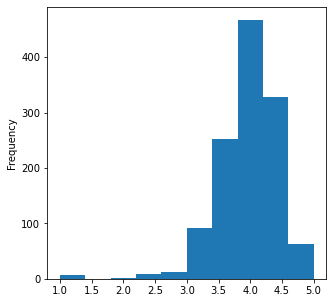

In [13]:
shoes_data_new['rating_new'].plot(kind='hist', figsize=(5, 5))

In [14]:
def likes():
    list_mentioned = list(shoes_data_new.rating_new.unique())
    dict_amount = {}
    dict_likes = {}
    for x in list_mentioned:
        counter = 0
        if x != 'nan':
            likes_per_person = shoes_data_new[shoes_data_new.rating_new == x].price_new
            l = list(likes_per_person)
            dict_amount[x] = len(list(l))
            for i in l:
                counter += i
            dict_likes[x] = counter
    return dict_amount, dict_likes

In [15]:
def medium(dict_amount, dict_likes):
    med_likes = {}
    for key in dict_likes:
        try:
            s = dict_likes[key]/dict_amount[key]
            med_likes[key] = round(s)
        except:
            continue
    a = sorted(med_likes.items(), key=lambda x: x[1], reverse=True)[:15]
    return a

In [16]:
def graph(a):
    nums = [w[-1] for w in a]
    labs = [w[0] for w in a]
    plt.figure(figsize=(20, 10), dpi=200)
    plt.bar(range(len(labs)), nums)

    plt.title('Средняя цена товаров, в зависимости от средних рейтингов')
    plt.ylabel('Средняя цена товаров')
    plt.xlabel('Средний рейтинг товаров')
    plt.xticks(range(len(labs)), labs, rotation=90)
    plt.show()

In [17]:
dl = likes()

In [18]:
h = medium(dl[0], dl[1])

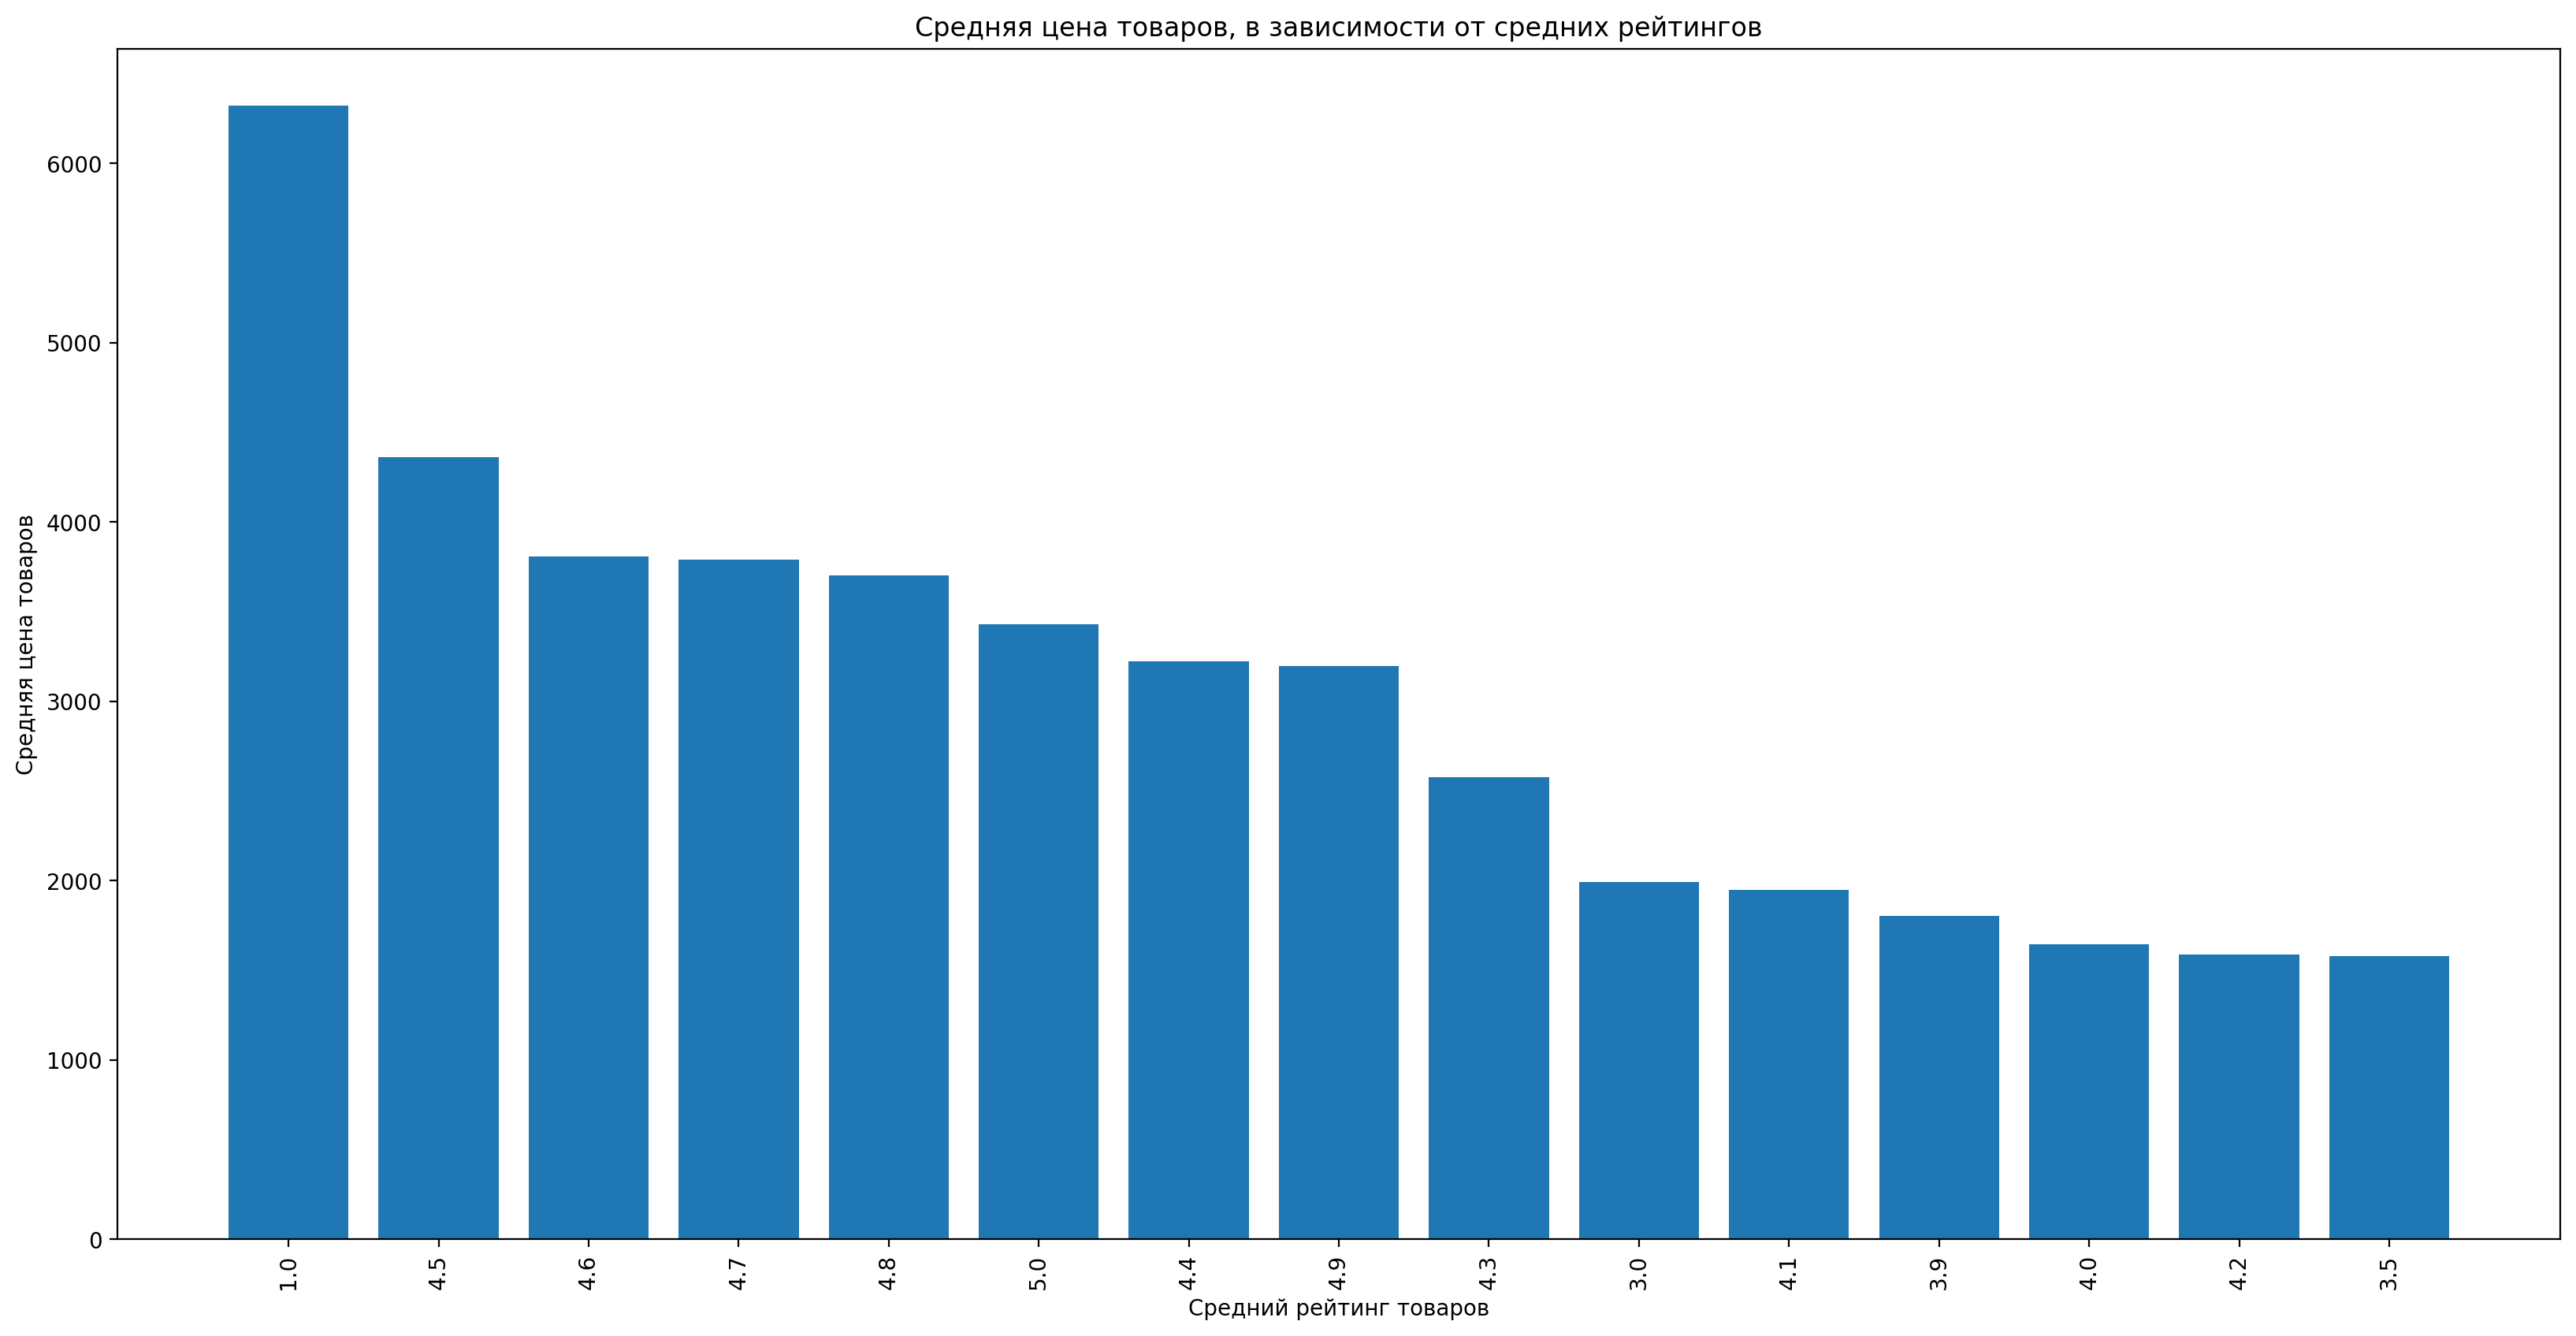

In [19]:
graph(h)

Таким образом: 

1) Цены на обувь находятся в промежутке от 127 до 7992 рупий, при этом бОльшая часть обуви стоит до 1000 рупий

2) Самые частотные средние оценки товаров: 4.0, 4.5 и 3.5

3) Самый низкий рейтинг имеет самая дорогая обувь; самый высокий рейтинг имеет обувь со средней стоимостью (примерно 3500 рупий); обувь с рейтингом 4.2 и 3.5 имеет самую низкую цену

### Препроцессинг

Я привожу все к нижнему регистру, делаю лемматизацию, убираю пунктуацию и стоп слова. Я не делаю стемминг, потому что он может привести к потере морфологической информации, в том числе частей речи.

In [20]:
def preprocessing(texts):
    preprocessed_texts = []
    for text in tqdm(texts):
        preprocessed_texts.append(' '.join(morph.parse(w.strip(punctuation))[0].normal_form for w in text.split()
                                           if w not in english_stopwords))

    return preprocessed_texts

In [21]:
product_description = list(shoes_data_new["product_description"])

In [22]:
product_description_prep = preprocessing(product_description)

100%|██████████| 1230/1230 [00:03<00:00, 374.00it/s]


In [23]:
shoes_data_new['product_description_prep'] = product_description_prep

In [24]:
title = list(shoes_data_new["title"])

In [25]:
title_prep = preprocessing(title)

100%|██████████| 1230/1230 [00:00<00:00, 3646.75it/s]


In [26]:
shoes_data_new['title_prep'] = title_prep

In [27]:
reviews = list(shoes_data_new["reviews"])

In [28]:
reviews_prep = preprocessing(reviews)

100%|██████████| 1230/1230 [00:01<00:00, 1148.23it/s]


In [29]:
shoes_data_new['reviews_prep'] = reviews_prep

### Векторизация

В shoes_data_new в дальнейшем положим вектора BoW (CountVectorizer), а в shoes_data_new_2 - вектора TFIDF

In [30]:
shoes_data_new_2 = shoes_data_new.copy()

Векторизуем названия, описания и отзывы с помощью CountVectorizer

In [31]:
vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(title_prep)
columns = ['title_' + str(i) for i in range(X.shape[1])]
c_v_df = pd.DataFrame(X.todense(), columns=columns)

In [33]:
shoes_data_new = pd.concat([shoes_data_new, c_v_df], axis=1)

In [35]:
vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(reviews_prep)
columns = ['reviews_' + str(i) for i in range(X.shape[1])]
c_v_df = pd.DataFrame(X.todense(), columns=columns)

In [36]:
shoes_data_new = pd.concat([shoes_data_new, c_v_df], axis=1)

In [38]:
vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(product_description_prep)
columns = ['product_description_' + str(i) for i in range(X.shape[1])]
c_v_df = pd.DataFrame(X.todense(), columns=columns)

In [39]:
shoes_data_new = pd.concat([shoes_data_new, c_v_df], axis=1)

Векторизуем названия, описания и отзывы с помощью TF-IDF

In [41]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(title_prep)
columns = ['title_' + str(i) for i in range(X.shape[1])]
c_v_df = pd.DataFrame(X.todense(), columns=columns)
shoes_data_new_2 = pd.concat([shoes_data_new_2, c_v_df], axis=1)

In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews_prep)
columns = ['reviews_' + str(i) for i in range(X.shape[1])]
c_v_df = pd.DataFrame(X.todense(), columns=columns)
shoes_data_new_2 = pd.concat([shoes_data_new_2, c_v_df], axis=1)

In [43]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(product_description_prep)
columns = ['product_description_' + str(i) for i in range(X.shape[1])]
c_v_df = pd.DataFrame(X.todense(), columns=columns)
shoes_data_new_2 = pd.concat([shoes_data_new_2, c_v_df], axis=1)

### Пробуем разные модели

Сначала сделаем классификацию. Для этого разделим цены на классы.

In [45]:
prices = list(shoes_data_new.price_new)

In [46]:
price_class = [(i // 1000) for i in prices]

In [47]:
shoes_data_new['price_class'] = price_class
shoes_data_new_2['price_class'] = price_class

In [48]:
del shoes_data_new['title_prep']
del shoes_data_new_2['title_prep']
del shoes_data_new['reviews_prep']
del shoes_data_new_2['reviews_prep']

In [49]:
del shoes_data_new['reviews_rating']
del shoes_data_new_2['reviews_rating']
del shoes_data_new['product_description_prep']
del shoes_data_new_2['product_description_prep']

В качестве признаков для обучения возьмем:

* векторизованные названия товаров
* рейтинги товаров
* векторизованные описания товаров
* количество отзывов на товары
* тип обуви (м/ж)

Начнем с метода ближайшего соседа на датасете с векторами BoW

In [50]:
all_columns = list(shoes_data_new.columns)

In [51]:
feature_columns = [col for col in all_columns if ('title_' in col) or ('product_description_' in col)]

In [52]:
feature_columns.append('rating_new')
feature_columns.append('shoe_type')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)

In [54]:
clf = KNeighborsClassifier().fit(X_train, y_train)

In [55]:
predicted = clf.predict(X_test)

In [56]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5911
micro F1=0.5911, micro P=0.5911, micro R=0.5911
macro F1=0.4895, macro P=0.4385, macro R=0.6898



Теперь качестве признаков для обучения возьмем:

* векторизованные названия товаров
* рейтинги товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [57]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6379
micro F1=0.6379, micro P=0.6379, micro R=0.6379
macro F1=0.4947, macro P=0.4766, macro R=0.6404



Как мы видим, без описания товаров модель стала работать лучше.

Посмотрим на качество работы модели со следующим набором признаков:

* рейтинги товаров
* векторизованные описания товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [58]:
feature_columns = [col for col in all_columns if ('product_description_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5837
micro F1=0.5837, micro P=0.5837, micro R=0.5837
macro F1=0.5040, macro P=0.4542, macro R=0.6714



Качество стало хуже, что и следовало из предыдущих результатов. 

Попробуем мультиномиальный наивный Байсовский классификатор на следующем наборе признаков (лучший набор из прошлых, далее тоже будет использоваться он):
* векторизованные названия товаров
* рейтинги товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [59]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6650
micro F1=0.6650, micro P=0.6650, micro R=0.6650
macro F1=0.4264, macro P=0.3878, macro R=0.6761



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Качество немного выше, чем у метода ближайших соседей

Метод ближайшего соседа на датасете с TFIDF

In [60]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_class,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6576
micro F1=0.6576, micro P=0.6576, micro R=0.6576
macro F1=0.5042, macro P=0.4946, macro R=0.5701



Качество стало лучше той же классификации, но с BoW, но все равно уступает байесовскому классификатору с BoW

Мультиномиальный наивный Байсовский классификатор c TFIDF

In [61]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_class,
                                                    test_size=0.33, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.4828
micro F1=0.4828, micro P=0.4828, micro R=0.4828
macro F1=0.1389, macro P=0.1642, macro R=0.1848



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Качество сильно упало

Теперь попробуем логистическую регрессию на BoW

In [62]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)

clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7291
micro F1=0.7291, micro P=0.7291, micro R=0.7291
macro F1=0.6354, macro P=0.5906, macro R=0.7810



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Попробуем логистическую регрессию на TFIDF

In [63]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_class,
                                                    test_size=0.33, random_state=42)

clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7118
micro F1=0.7118, micro P=0.7118, micro R=0.7118
macro F1=0.6038, macro P=0.5390, macro R=0.8262



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Попробуем метод опорных векторов

Сначала с BoW

In [64]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)

clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7291
micro F1=0.7291, micro P=0.7291, micro R=0.7291
macro F1=0.6430, macro P=0.6080, macro R=0.7405



Теперь с TFIDF

In [65]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_class,
                                                    test_size=0.33, random_state=42)

clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7414
micro F1=0.7414, micro P=0.7414, micro R=0.7414
macro F1=0.6498, macro P=0.6091, macro R=0.7264



Деревья решений с BoW

In [66]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_class,
                                                    test_size=0.33, random_state=42)

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7094
micro F1=0.7094, micro P=0.7094, micro R=0.7094
macro F1=0.6048, macro P=0.5729, macro R=0.7029



Деревья решений с TFIDF

In [67]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_class,
                                                    test_size=0.33, random_state=42)

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7143
micro F1=0.7143, micro P=0.7143, micro R=0.7143
macro F1=0.6523, macro P=0.6209, macro R=0.6947



Lasso c BoW

In [68]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_new,
                                                    test_size=0.33, random_state=42)

clf = Lasso(alpha=10).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  829.9509370922685


Lasso с TFIDF

In [69]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_new,
                                                    test_size=0.33, random_state=42)

clf = Lasso(alpha=10).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  1002.1411283227577


Ridge с BoW

In [70]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_new,
                                                    test_size=0.33, random_state=42)

clf = Ridge().fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  574.5742473888711


Ridge с TFIDF

In [71]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_new,
                                                    test_size=0.33, random_state=42)

clf = Ridge().fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  691.3383518555916


LinearSVR с BoW

In [72]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_new,
                                                    test_size=0.33, random_state=42)

clf = LinearSVR(C=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  1187.3246640197149


LinearSVR c TFIDF

In [73]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_new,
                                                    test_size=0.33, random_state=42)

clf = LinearSVR(C=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  1214.894758919063


### Лучшая модель классификации - SVM на следующем наборе признаков:
* векторизованные названия товаров (TFIDF)
* рейтинги товаров
* количество отзывов на товары
* тип обуви (м/ж)

### Попробуем применить к ней гридсерч

In [74]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.price_class,
                                                    test_size=0.33, random_state=42)
parameters = {'penalty':('l1', 'l2'), 'loss':('hinge', 'squared_hinge'), 'C':[i for i in range(10)]}
svc = LinearSVC()
scorer = make_scorer(accuracy_score)
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring=scorer)
clf.fit(X_train, y_train)

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn/svm/_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/kseni

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn/svm/_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/kseni

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-package

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-package

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-package

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-package

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-package

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/skle

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')},
             scoring=make_scorer(accuracy_score))

In [75]:
print('Лучшие значения гиперпараметров: ')
print(clf.best_params_)
predicted = clf.predict(X_test)
print('Значения метрик на тестовой выборке', m)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

Лучшие значения гиперпараметров: 
{'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Значения метрик на тестовой выборке 1214.894758919063
acc=0.7414
micro F1=0.7414, micro P=0.7414, micro R=0.7414
macro F1=0.6498, macro P=0.6091, macro R=0.7264



Лучшее качество осталось прежним.

In [76]:
categories = [0, 1, 2, 3, 4, 5, 6, 7]

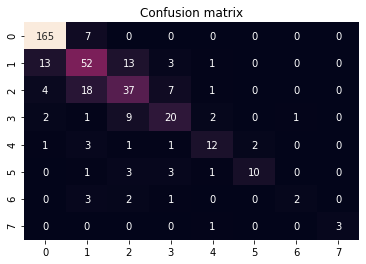

In [77]:
sns.heatmap(data=confusion_matrix(y_test, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

* Как мы видим, модель хорошо справляется с товарами, стоимость которых не привышает 1000 рупий
* Также модель хорошо справляется с товарами стоимостью от 1 до 2 тыс. рупий, но достаточно часто ошибочно относит товары из этой ценовой категории к товарам, которые стоят 2-3 тыч. рупий
* В двух из четырех случаях модель ошибается с товарами, которые стоят 6-7 тыс. рупий
* В остальных случаях модель показывает нормальные результаты: бОльшая часть определена по правильным классам, и меньшая - по неправильным

### Лучшая модель регресси - Ridge со следующим набором признаков:

* векторизованные названия товаров (BoW)
* рейтинги товаров
* количество отзывов на товары
* тип обуви (м/ж)

### Попробуем применить к ней гридсерч

In [78]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_new,
                                                    test_size=0.33, random_state=42)
parameters = {'alpha':[i for i in range(11)], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg',
                                                         'sag', 'saga']}
reg = Ridge()
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
clf = GridSearchCV(estimator=reg,param_grid=parameters, scoring=scorer)
clf.fit(X_train, y_train)

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix i

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [79]:
print('Лучшие значения гиперпараметров: ')
print(clf.best_params_)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error на тестовой выборке = ', m)

Лучшие значения гиперпараметров: 
{'alpha': 0, 'solver': 'saga'}
mean absolute error на тестовой выборке =  549.6824633868761


С обновленными гиперпараметрами значение средней ошибки уменьшилось на 20 рупий.

In [80]:
feature_columns = [col for col in all_columns if ('title_' in col)]
feature_columns.append('rating_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.price_new,
                                                    test_size=0.33, random_state=42)
parameters = {'alpha':[i for i in range(11)], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg',
                                                         'sag', 'saga']}

reg = Ridge(alpha=0, solver='saga')
reg.fit(X_train, y_train)

Ridge(alpha=0, solver='saga')

Посмотрим на важность признаков

In [81]:
def importances(model, feature_columns):
    l1 = sorted(list(zip(list(model.coef_), feature_columns)), reverse=True)
    l2 = []
    counter_1 = 0
    counter_2 = 0
    counter_3 = 0
    for i in l1:
        if 'title_' in i[1]:
            counter_1 += i[0]
        elif 'reviews_' in i[1]:
            counter_2 += i[0]
        elif 'product_description_' in i[1]:
            counter_3 += i[0]
        else:
            l2.append(i)
            
    
    if counter_1 != 0:
        l2.append((counter_1, 'title_embeddings'))
        
    if counter_2 != 0:
        l2.append((counter_2, 'reviews_embeddings'))
        
    if counter_3 != 0:
        l2.append((counter_3, 'product_description_embeddings'))    
        
    print(sorted(l2, reverse=True))
    plt.bar([l[1] for l in l2], [l[0] for l in l2])
    plt.show()

[(43000.108778324975, 'title_embeddings'), (1131.1506413930792, 'shoe_type'), (-30.21544764715223, 'rating_new')]


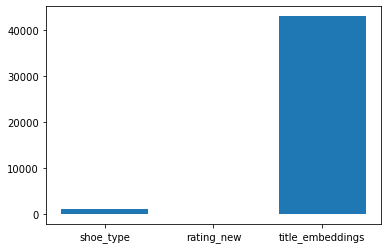

In [82]:
importances(reg, feature_columns)

Как мы видим, наличие признака рейтинга товаров не влияет на работу модели, а вид обуви (м/ж) имеет совсем маленькое влияние

In [83]:
predicted = reg.predict(X_test)

In [84]:
predicted[:20]

array([2798.70965589, 2924.19658507,  712.45275215, 2594.16839302,
       6119.88602916, 2518.04979275,  556.85116688, 2798.70965589,
        672.1617313 ,  756.62254215, 1856.77857909,  620.32888636,
        698.94955486, 3801.32294097, 3522.16340076, 2345.03322262,
        752.41690108,  812.95827768,  837.20414374, 2798.70965589])

In [85]:
y_test[:20]

548     2941.0
704     3599.0
244      569.0
552     2050.0
1164    6126.0
1049    2449.0
901      379.0
589     1273.0
101      349.0
128      299.0
420     1049.0
977      599.0
210      729.0
1092    3779.0
541     2186.0
415     1574.0
869      598.0
365      836.0
899      374.0
328     1509.0
Name: price_new, dtype: float64

In [86]:
shoes_data[550:555]

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
550,Skechers Men Go 600 Running Shoes,₹2474.00,4.3 out of 5 stars,235 ratings,Upper: Strong yet soft dual-tone textured knit...,Excellent light weight stylish shoes grip and ...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 2.0 ...,Men
551,Skechers Men's Go Run Tr-Torch Shoes,₹2250.00,4.2 out of 5 stars,385 ratings,Skechers footwear with comfort and style.,Product is too good|| It's a perfect piece of ...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 4.0 ...,Men
552,Adidas Men Running Shoes,₹2050.00,4.4 out of 5 stars,3 ratings,Adidas is the world's leading manufacturer of ...,Adidas the best|| Impressive prroduct,5.0 out of 5 stars|| 4.0 out of 5 stars,Men
553,Hush Puppies Men Elgar Oxford Leather Formal S...,₹3644.00,4.0 out of 5 stars,137 ratings,Experience great comfort walking in this pair ...,Good product from Hush puppies|| Very comforta...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Men
554,New Balance Men's Fresh Foam Roav v1 Running Shoe,₹2942.00,4.6 out of 5 stars,251 ratings,Designed for athletes on-the-go the New Balanc...,Report abuse|| Report abuse|| Verified Purchas...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men


In [87]:
shoes_data[585:590]

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
585,Puma Men Emergence Running Shoes,₹2469.00,4.1 out of 5 stars,428 ratings,All new Emergence pushes the boundaries of our...,Happy|| Awesome 5 star 👌😍👍|| Awesome|| Looks g...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
586,Hush Puppies Men Cash New Formal Shoes,₹2780.00,4.0 out of 5 stars,289 ratings,Experience great comfort walking in this pair ...,Defective / Rejected Product|| It seems Used P...,2.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Men
587,Power Men's Natural Engage Running Shoes,₹1220.00,4.3 out of 5 stars,411 ratings,Experience great comfort walking in this pair ...,Great shoes|| Great deal and amazing shoes.|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
588,Hush Puppies Men's Chic Trim Crust Loafers,₹3149.00,4.0 out of 5 stars,198 ratings,Avail an exciting and edgy collection of sport...,Damaged products at discounted price!|| Leathe...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 4.0 ...,Men
589,Adidas Men's Hyperon-1.0-m Running Shoe,₹1273.00,3.9 out of 5 stars,498 ratings,Adidas Men's HYPERON M LEGEAR/VISGRE/CBLACK/AC...,Great Product Verified as Original|| Misleadin...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 2.0 ...,Men


In [88]:
shoes_data[540:545]

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
540,ASICS Men's Jolt 3 Running Shoe,₹2618.00,4.1 out of 5 stars,260 ratings,Run and walk in comfort with the new JOLT™ 3 s...,Heavy and an ungainly pair of shoes|| Very ver...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 ...,Men
541,Nike Men's Todos Running Shoes,₹2186.00,4.0 out of 5 stars,1374 ratings,Sustainably crafted with families in mind the ...,Nike|| DUPLICATE PRODUCT|| Comfortable and ori...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
542,US Polo Association Men's Lebron 2.0 Sneaker,₹2199.45,3.7 out of 5 stars,12 ratings,US Polo Association LEBRON 2.0 Men's Sneakers,Good luking,5.0 out of 5 stars,Men
543,Red Chief Springer Derby Casual Shoe for Men R...,₹2546.00,3.8 out of 5 stars,112 ratings,Make your mark in the fashion world and gain t...,Very comfortable for Daily Use|| Perfect Fit||...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Men
544,Hush Puppies Men Fuel Slip On-2 Leather Formal...,₹2405.00,3.9 out of 5 stars,119 ratings,Experience great comfort walking in this pair ...,Hush puppies product|| Fake product|| Good one...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men


In [89]:
shoes_data[413:418]

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
413,Campus Men's Renegade Running Shoes,₹1682.00,3.7 out of 5 stars,90 ratings,Meet the ultimate street star. Campus Renegade...,VERY POOR QUALITY SHOES!|| Not sure of the gen...,1.0 out of 5 stars|| 2.0 out of 5 stars|| 5.0 ...,Men
414,Hush Puppies Men Boston New Slip On Leather Fo...,₹1750.00,4.1 out of 5 stars,189 ratings,Experience great comfort walking in this pair ...,Show Quality is pathetic it started to open up...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
415,new balance Men's W520il5 Running Shoe,₹1574.00,3.5 out of 5 stars,7 ratings,A unique and versatile New Balance Running sho...,Nice shoes|| Very good product|| The product i...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 2.0 ...,Men
416,Adidas Men's Lite Racer 2.0 Running Shoes,₹1883.00,4.0 out of 5 stars,1110 ratings,A dynamic go- everywhere shoe for the sports- ...,Authentic Adidas Shoes 11|| Nice one👍|| Authen...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
417,Adidas Men's Strikerr M Running Shoes,₹1820.00,3.7 out of 5 stars,35 ratings,Profile: make running a part of your everyday ...,Color is like not carbon but more like a bleed...,3.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men


In [90]:
shoes_data[325:330]

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
325,Reebok Men's Ridge Runner Running Shoe,₹1413.00,3.9 out of 5 stars,30 ratings,The footwear allows your foot to flex as it wa...,Worth it!!!|| Very vood shoes|| It's copy not ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 1.0 ...,Men
326,Bacca Bucci Zeus Men Fashion Sneakers/Running ...,₹1299.00,4.5 out of 5 stars,11 ratings,Bacca Bucci Zeus Men Fashion Sneakers/Running ...,This shoes are parfect size comfortable and pr...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
327,Red Tape Men's Walking Shoes,₹1049.00,3.9 out of 5 stars,7 ratings,Red Tape flow+ slip-on with ‘memory foam’ inso...,Good|| Poor quality,5.0 out of 5 stars|| 1.0 out of 5 stars,Men
328,Adidas Men's Hyperon-1.0-m Running Shoe,₹1509.00,3.9 out of 5 stars,508 ratings,Adidas Men's HYPERON M LEGEAR/VISGRE/CBLACK/AC...,Great Product Verified as Original|| Misleadin...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 2.0 ...,Men
329,Puma Men's Flex Hype Idp Sneaker,₹1719.00,3.9 out of 5 stars,20 ratings,Crafted with fine technology and futuristic de...,After 1 day use|| Why no one can pick the retu...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men


Модель часто сильно ошибается, предсказывая, что кроссовки значительно дороже, чем на самом деле. Такое часто происходит с кроссовками адидас, но для других фирм тоже такое случается. У меня есть два предположения:

* У адидаса есть ряд обуви, которая стоит дешевле, чем другие кроссовки бренда, и дорогих кроссовок больше. Тогда логично, что модель ошибается
* Возможно в датасете есть товары со скидкой (но этого я не знаю). Если такие вдруг есть, то хорошо было бы указывать размер скидки, чтобы можно было вычислить полную стоимость этих товаров. Еще можно было бы добавить бинарный признак в зависимости от того, есть на товар скидка или нет, так как часто скидки действуют на товары определенного бренда

### Выводы

Думаю, что для улучшения работы обеих лучших моделей можно было бы сбалансировать выборку, чтобы все ценовые классы были хорошо представлены в данных (то есть добавить в данные побольше дорогих товаров). Еще в идеале я бы подключила неровскую модель, чтобы извлекать из названия товаров бренды, так как бренды можно разделить на более дорогие/дешевые. Можно было бы вынести бренды в качестве отдельного признака и, таким образом, дать этому признаку бОльший вес.

## Задание 2

### Мы уже посмотрели на общую информацию о данных, поэтому теперь посмотрим на релевантные конкретно для первой задачи визуализации

Распределение количества отзывов

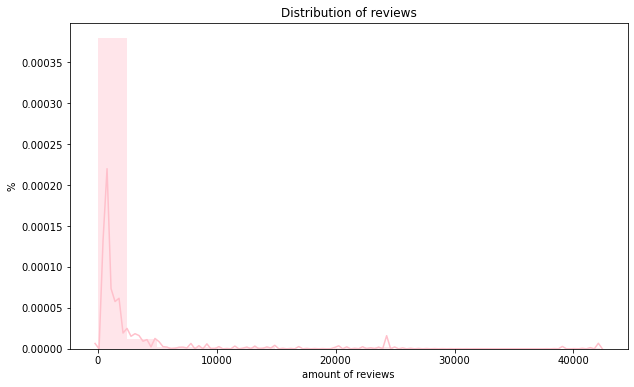

In [91]:
plt.figure(figsize=(10, 6))
sns.distplot(shoes_data_new['total_reviews_new'], bins=17, color='pink')
plt.title('Distribution of reviews')
plt.ylabel('%')
plt.xlabel('amount of reviews');

Как мы видим, большинство товаров имеют примерно до 2500 отзывов. 

Распределение оценок товаров

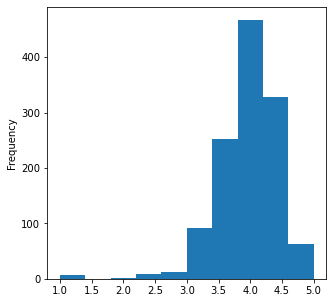

In [92]:
shoes_data_new['rating_new'].plot(kind='hist', figsize=(5, 5))

Средняя длина отзывов в зависимости от средней оценки товара

In [93]:
def likes():
    list_mentioned = list(shoes_data_new.rating_new.unique())
    dict_amount = {}
    dict_likes = {}
    for x in list_mentioned:
        counter = 0
        if x != 'nan':
            likes_per_person = shoes_data_new[shoes_data_new.rating_new == x].mean_len_reviews
            l = list(likes_per_person)
            dict_amount[x] = len(list(l))
            for i in l:
                counter += i
            dict_likes[x] = counter
    return dict_amount, dict_likes

In [94]:
def medium(dict_amount, dict_likes):
    med_likes = {}
    for key in dict_likes:
        try:
            s = dict_likes[key]/dict_amount[key]
            med_likes[key] = round(s)
        except:
            continue
    a = sorted(med_likes.items(), key=lambda x: x[1], reverse=True)[:15]
    return a

In [95]:
def graph(a):
    nums = [w[-1] for w in a]
    labs = [w[0] for w in a]
    plt.figure(figsize=(20, 10), dpi=200)
    plt.bar(range(len(labs)), nums)

    plt.title('Средняя длина отзывов, в зависимости от средних рейтингов')
    plt.ylabel('Средняя цена товаров')
    plt.xlabel('Средний рейтинг товаров')
    plt.xticks(range(len(labs)), labs, rotation=90)
    #plt.legend()
    plt.show()

In [96]:
dl = likes()

In [97]:
h = medium(dl[0], dl[1])

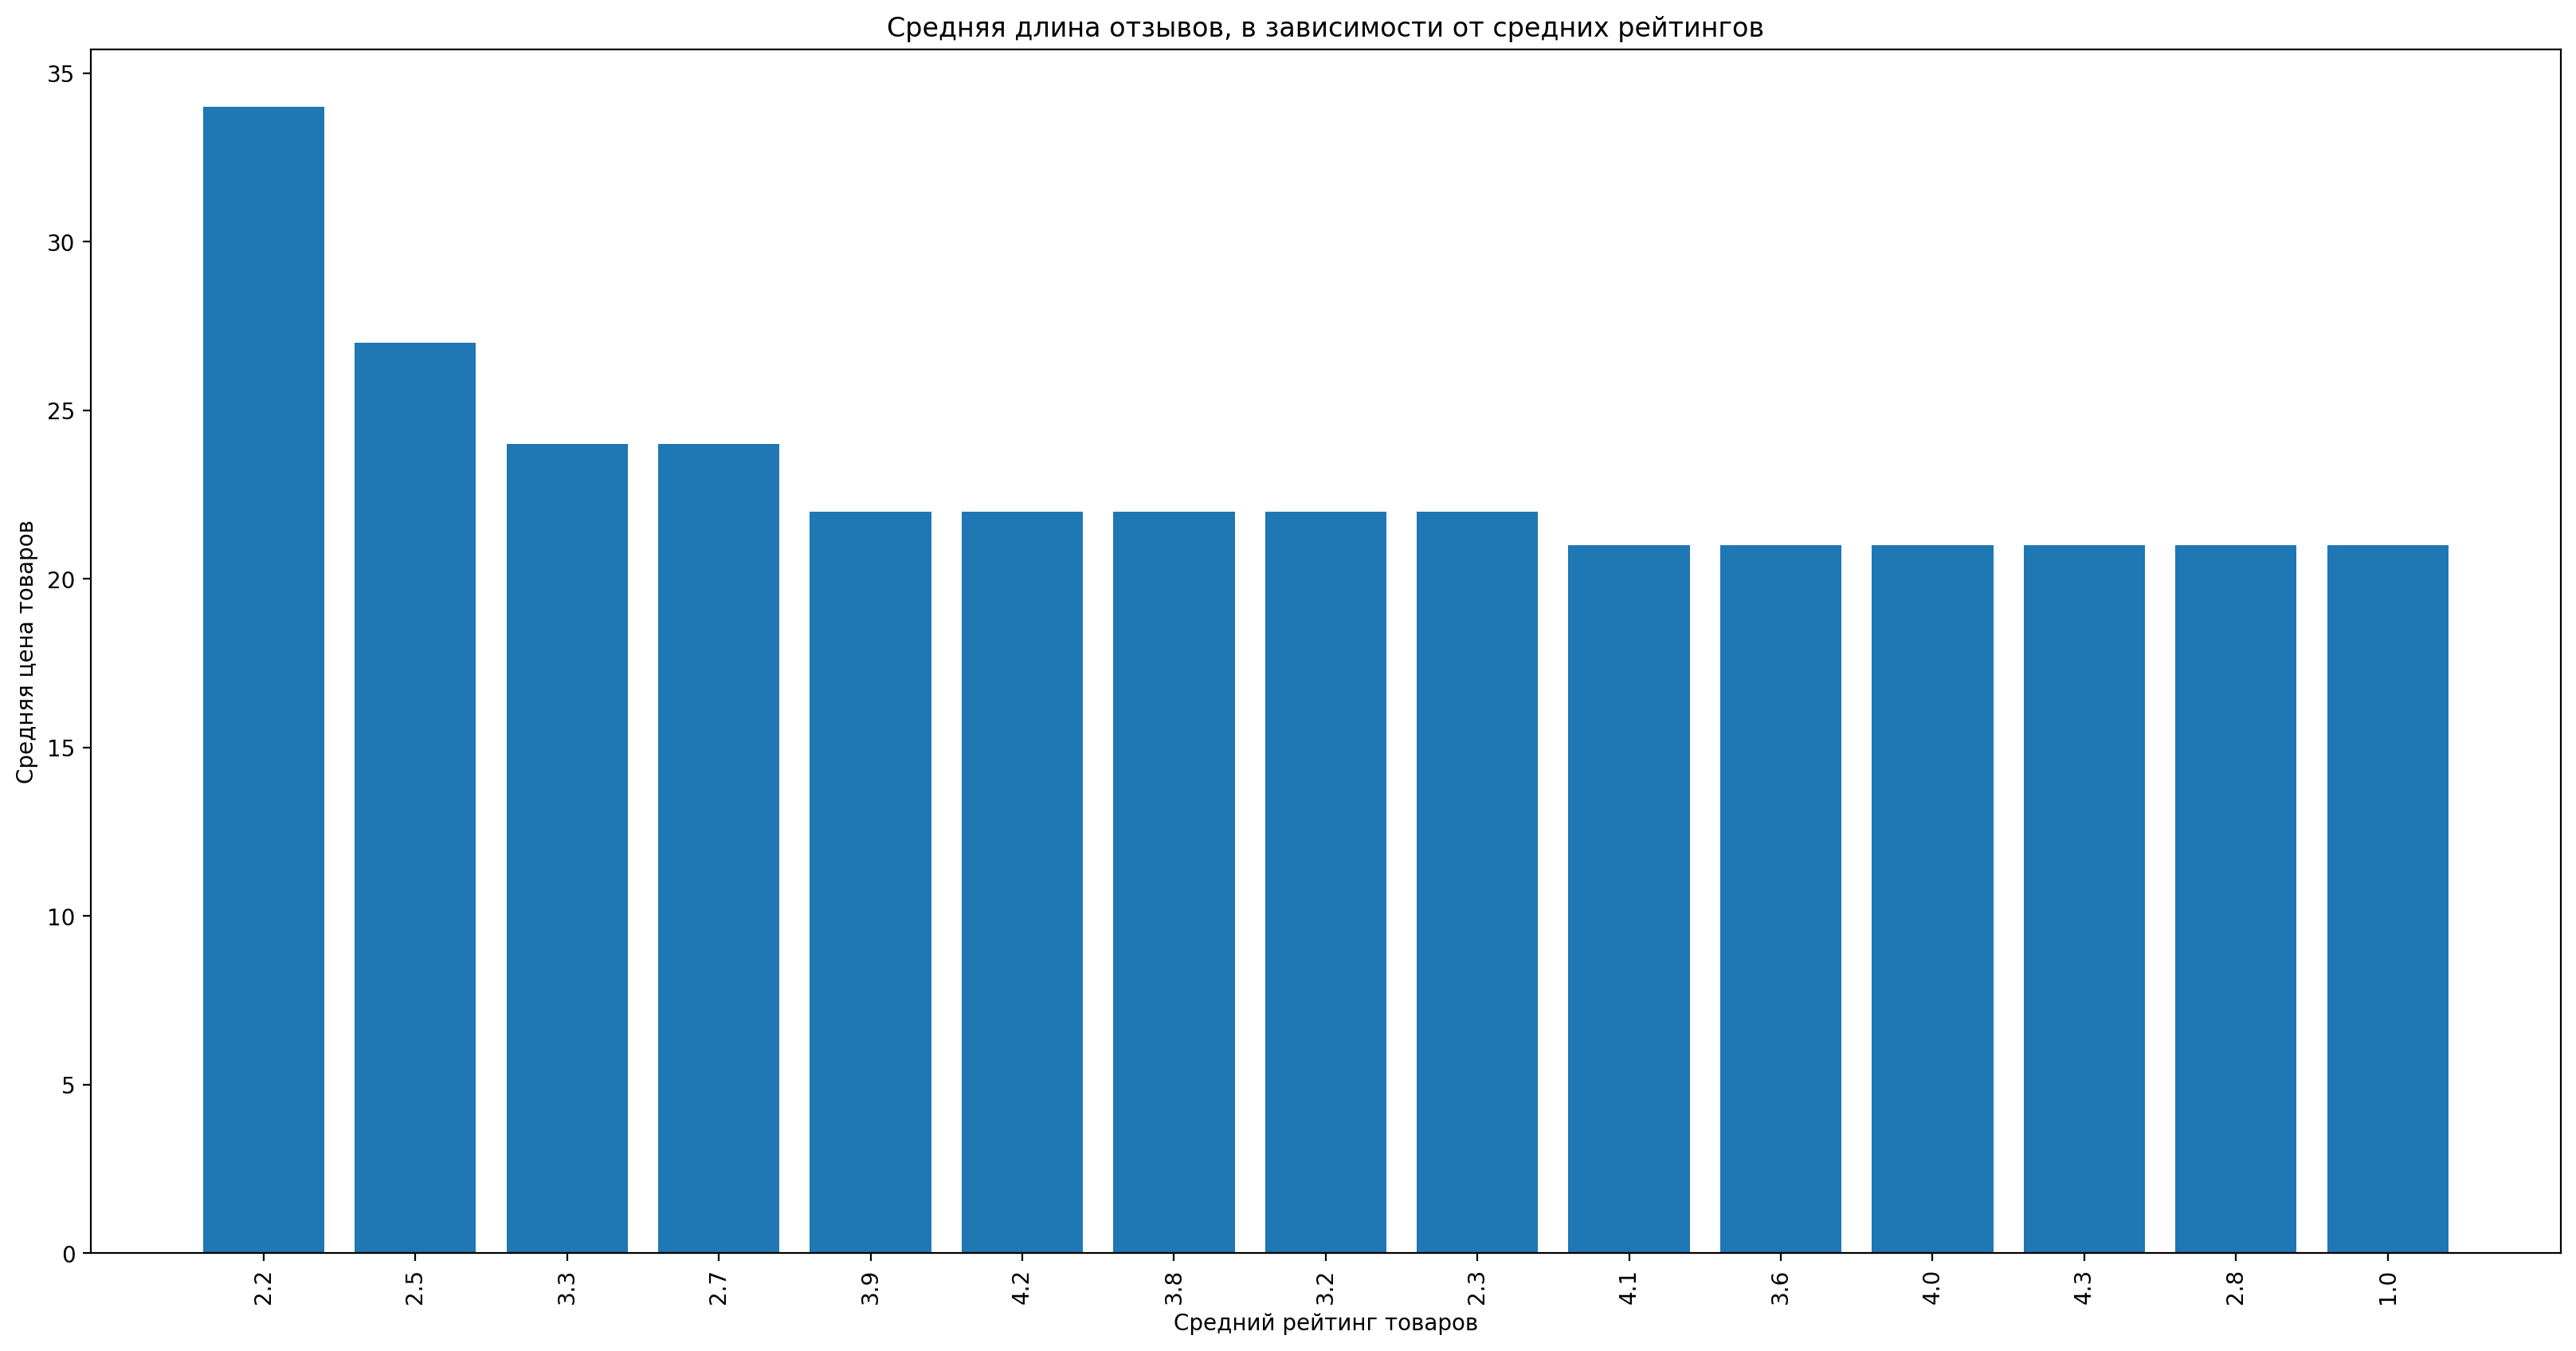

In [98]:
graph(h)

Корреляции между средней длиной отзывов и оценками товаров практически нет. Разве что отзывы для товаров со средним рейтингом 2.2 имеют бОльшую длину. Можно было бы предположить, что люди оставляют более длинные отзывы, когда им не нравится товар, но тогда и отзывы на товары со средней оценкой 1.0 были бы длиннее.

### Попробуем разные модели

Но для начала округлим средние отзывы товаров. 

In [99]:
def int_r(num):
    num = int(num + (0.5 if num > 0 else -0.5))
    return num

In [100]:
round_ratings = []
for index, row in tqdm(shoes_data_new.iterrows()):
    round_rating = int_r(row['rating_new'])
    round_ratings.append(round_rating)

1230it [00:02, 429.39it/s]


In [101]:
shoes_data_new['rounded_rating'] = round_ratings
shoes_data_new_2['rounded_rating'] = round_ratings

Метод ближайшего соседа с BoW

В качестве признаков для обучения возьмем:

* векторизованные названия товаров
* цены товаров
* векторизованные описания товаров
* векторизованные отзывы товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [102]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('title_' in col) or ('product_description_' in col)
                  or ('reviews_' in col)]
feature_columns.append('price_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8128
micro F1=0.8128, micro P=0.8128, micro R=0.8128
macro F1=0.4840, macro P=0.5079, macro R=0.4858



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Теперь попробуем посмотреть на качество при следующем наборе признаков:

* цены товаров
* векторизованные описания товаров
* векторизованные отзывы товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [103]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]
feature_columns.append('price_new')
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8128
micro F1=0.8128, micro P=0.8128, micro R=0.8128
macro F1=0.4840, macro P=0.5079, macro R=0.4858



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Теперь попробуем посмотреть на качество при следующем наборе признаков:

* векторизованные описания товаров
* векторизованные отзывы товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [104]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8227
micro F1=0.8227, micro P=0.8227, micro R=0.8227
macro F1=0.6050, macro P=0.6006, macro R=0.6979



Без указания цены качество улучшилось

Теперь попробуем посмотреть на качество при следующем наборе признаков:

* векторизованные отзывы товаров
* количество отзывов на товары
* тип обуви (м/ж)

In [105]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if 'reviews_' in col]
feature_columns.append('shoe_type')
X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7833
micro F1=0.7833, micro P=0.7833, micro R=0.7833
macro F1=0.4228, macro P=0.4569, macro R=0.4265



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Без векторизованных описаний товаров качество ухудшилось

Теперь попробуем посмотреть на качество при следующем наборе признаков:

* векторизованные описания товаров
* векторизованные отзывы товаров
* количество отзывов на товары

In [106]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8227
micro F1=0.8227, micro P=0.8227, micro R=0.8227
macro F1=0.6050, macro P=0.6006, macro R=0.6979



В дальнейшем будем работать с последним набором признаков. 

Метод ближайшего соседа с TFIDF

In [107]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7931
micro F1=0.7931, micro P=0.7931, micro R=0.7931
macro F1=0.5535, macro P=0.5923, macro R=0.5418



мультиномиальный наивный Байесовский классификатор c BoW

In [108]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5493
micro F1=0.5493, micro P=0.5493, micro R=0.5493
macro F1=0.4589, macro P=0.4959, macro R=0.5418



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


мультиномиальный наивный Байесовский классификатор c TFIDF

In [109]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6576
micro F1=0.6576, micro P=0.6576, micro R=0.6576
macro F1=0.3162, macro P=0.3614, macro R=0.3306



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Логистическая регрессия с BoW

In [110]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc=0.8399
micro F1=0.8399, micro P=0.8399, micro R=0.8399
macro F1=0.6771, macro P=0.6420, macro R=0.7568



Логистическая регрессия с TFIDF

In [111]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc=0.8300
micro F1=0.8300, micro P=0.8300, micro R=0.8300
macro F1=0.3466, macro P=0.3303, macro R=0.4604



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метод опорных векторов с BoW

In [112]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8276
micro F1=0.8276, micro P=0.8276, micro R=0.8276
macro F1=0.5169, macro P=0.4981, macro R=0.5764



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метод опорных векторов с TFIDF

In [113]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.3005
micro F1=0.3005, micro P=0.3005, micro R=0.3005
macro F1=0.3609, macro P=0.3366, macro R=0.5147



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Деревья решений с BoW

In [114]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8276
micro F1=0.8276, micro P=0.8276, micro R=0.8276
macro F1=0.6641, macro P=0.7132, macro R=0.6329



Деревья решений с TFIDF

In [115]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rounded_rating,
                                                    test_size=0.33, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8522
micro F1=0.8522, micro P=0.8522, micro R=0.8522
macro F1=0.5949, macro P=0.5911, macro R=0.6040



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lasso c BoW

In [116]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rating_new,
                                                    test_size=0.33, random_state=42)
clf = Lasso(alpha=10).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  0.3027417317439193


Lasso c TFIDF

In [117]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rating_new,
                                                    test_size=0.33, random_state=42)
clf = Lasso(alpha=10).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  0.3027417317439193


Ridge c Bow

In [118]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rating_new,
                                                    test_size=0.33, random_state=42)
clf = Ridge().fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  0.27807912881017616


Ridge c TFIDF

In [119]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rating_new,
                                                    test_size=0.33, random_state=42)
clf = Ridge().fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  0.22115618801406348


LinearSVR c BoW

In [120]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rating_new,
                                                    test_size=0.33, random_state=42)
clf = LinearSVR(C=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  0.5300621391961294


/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR c TFIDF

In [121]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rating_new,
                                                    test_size=0.33, random_state=42)
clf = LinearSVR(C=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error = ', m)

mean absolute error =  0.2948453956840351


/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Лучшие модели  класссификации: 

1) Логистическая регрессия с BoW

2) Деревья решений с TFIDF

Попробуем применить гридсерч к каждой из них

### Гридсерч для логистической регрессии с BoW

In [130]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new[feature_columns], shoes_data_new.rounded_rating,
                                                    test_size=0.33, random_state=42)

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'C':[i for i in range(11)]}
svc =  LogisticRegression()
scorer = make_scorer(accuracy_score)
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring=scorer)
clf.fit(X_train, y_train)

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kseniapetuhova/op

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring=make_scorer(accuracy_score))

In [131]:
print('Лучшие значения гиперпараметров: ')
print(clf.best_params_)
predicted = clf.predict(X_test)
print('Значения метрик на тестовой выборке: ')
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

Лучшие значения гиперпараметров: 
{'C': 1, 'penalty': 'l2'}
Значения метрик на тестовой выборке: 
acc=0.8399
micro F1=0.8399, micro P=0.8399, micro R=0.8399
macro F1=0.6771, macro P=0.6420, macro R=0.7568



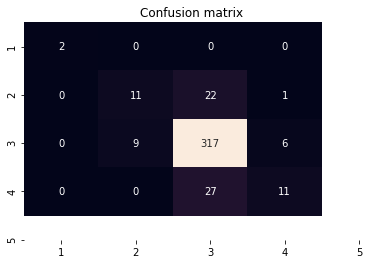

In [132]:
categories = [1, 2, 3, 4, 5] # в датасете нет товаров со средним рейтингом >= 4.5
sns.heatmap(data=confusion_matrix(y_test, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

Как видно из матрицы смежности:

* модель правильно предсказала оценку 1 для всех двух товаров
* модель часто ошибочно присваивает оценку 3 товаром с оценкой 2
* модель хорошо предсказывает оценку для товаров с рейтингом 3, но иногда ошибается и предсказывает оценки 4 и 2
* в большинстве случаев модель правильно предсказывает оценку 4, но довольно часто ошибочно присваивает товарам с оценкой 4 оценку 3

### Гридсерч для деревьев решений с TFIDF

In [133]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rounded_rating,
                                                    test_size=0.33, random_state=42)

parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random')}
svc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)
clf = GridSearchCV(estimator=svc, param_grid=parameters, scoring=scorer)
clf.fit(X_train, y_train)

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'splitter': ('best', 'random')},
             scoring=make_scorer(accuracy_score))

In [134]:
print('Лучшие значения гиперпараметров: ')
print(clf.best_params_)
predicted = clf.predict(X_test)
print('Значения метрик на тестовой выборке: ')
predicted = clf.predict(X_test)
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = precision_score(predicted, y_test, average = 'micro')
micro_r = recall_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = precision_score(predicted, y_test, average = 'macro')
macro_r = recall_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

Лучшие значения гиперпараметров: 
{'criterion': 'gini', 'splitter': 'random'}
Значения метрик на тестовой выборке: 
acc=0.8177
micro F1=0.8177, micro P=0.8177, micro R=0.8177
macro F1=0.5691, macro P=0.5734, macro R=0.5655



/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


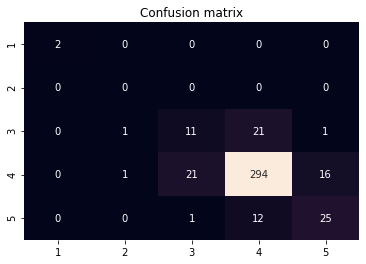

In [135]:
categories = [1, 2, 3, 4, 5]
sns.heatmap(data=confusion_matrix(y_test, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

Как мы видим из матрицы смежности:

* модель правильно предсказала оценку для товаров с рейтингами 1 и 2
* модель часто ошибочно относит товары из третьего класса к четвертому
* модель в большинстве случаев правильно определяет товары четвертого класса, но иногда ошибочно относит их к третьему классу
* модель в большинстве случаев правильно определяет товары пятого класса, но часто ошибочно относит их к четвертому классу

### Лучшая модель регрессии - Ridge с TFIDF
### Попробуем применить к ней гридсерч

In [136]:
all_columns = list(shoes_data_new.columns)
feature_columns = [col for col in all_columns if ('product_description_' in col)
                  or ('reviews_' in col)]

feature_columns.append('shoe_type')

X_train, X_test, y_train, y_test = train_test_split(shoes_data_new_2[feature_columns], shoes_data_new_2.rating_new,
                                                    test_size=0.33, random_state=42)
parameters = {'alpha':[i for i in range(11)], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg',
                                                         'sag', 'saga']}
reg = Ridge()
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
clf = GridSearchCV(estimator=reg,param_grid=parameters, scoring=scorer)
clf.fit(X_train, y_train)

/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kseniapetuhova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix i

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [137]:
print('Лучшие значения гиперпараметров: ')
print(clf.best_params_)
predicted = clf.predict(X_test)
m = mean_absolute_error(y_test, predicted)
print('mean absolute error на тестовой выборке = ', m)

Лучшие значения гиперпараметров: 
{'alpha': 1, 'solver': 'auto'}
mean absolute error на тестовой выборке =  0.22115618801406348


Модель действительно хорошо предсказывает рейтинг товаров. Однако, как мне кажется, задача регрессии в случае с отзывами выглядит достаточно искусственно, потому что совсем не понятна разница между, например, рейтингом 3.7 и рейтингом 3.8, ее сложно интерпретировать не только машине, но и человеку.

### Выводы

Чтобы улучшить качество работы всех трех последних моделей, я бы предложила доставать из текстов отзывов интенты положительной/отрицательной оценки, а также добавила бы в качестве признаков для обучения всякие признаки по типу наличия слов, написанных капсом, наличие последовательности восклицательных знаков или точек (исходя из предположения, что злой покупатель более эмоционален) и т.д.